# Deep Learning with PyTorch Step-by-Step: A Beginner's Guide

# Chapter 1

In [ ]:
#################################################
# If you're using Google Colab, please run this #
# cell to avoid errors importing torchviz       #
#################################################
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install torchviz

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# A Simple Regression Problem

## Data Generation

### Synthetic Data Generation

In [2]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

### Cell 1.1

In [3]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

Text(0.5, 1.0, 'Generated Data - Validation')

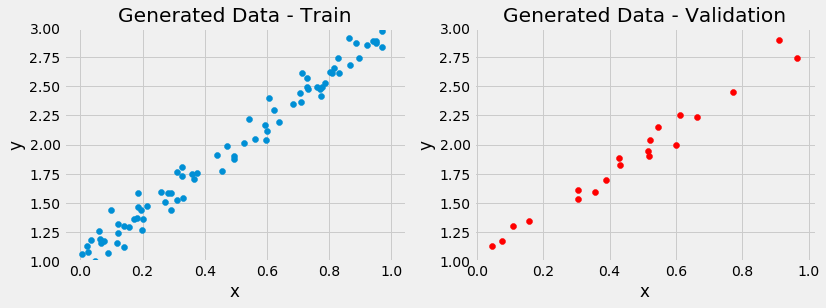

In [4]:
# Code for generating Figure 1
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(x_train, y_train)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim([0, 3])
ax[0].set_title('Generated Data - Train')
ax[1].scatter(x_val, y_val, c='r')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_ylim([0, 3])
ax[1].set_title('Generated Data - Validation')

# Gradient Descent

## Step 0: Random Initialization

In [5]:
# Step 0 - Initializes parameters "a" and "b" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


## Step 1: Compute Model's Predictions

In [6]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train

## Step 2: Compute the Loss

In [7]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient descent
# How wrong is our model? That's the error! 
error = (y_train - yhat)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

print(loss)

2.7421577700550976


## Step 3: Compute the Gradients

In [8]:
# Step 3 - Computes gradients for both "a" and "b" parameters
b_grad = -2 * error.mean()
w_grad = -2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


## Step 4: Update the Parameters

In [9]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1
print(b, w)

# Step 4 - Updates parameters using gradients and the learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


## Step 5: Rinse and Repeat!

In [10]:
# Go back to Step 1 and run observe how your parameters b and w change

# Linear Regression in Numpy

### Cell 1.2

In [11]:
# Step 0 - Initializes parameters "a" and "b" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes our model's predicted output - forward pass
    yhat = b + w * x_train
    
    # Step 2 - Computes the loss
    # We are using ALL data points, so this is BATCH gradient descent
    # How wrong is our model? That's the error! 
    error = (y_train - yhat)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()
    
    # Step 3 - Computes gradients for both "a" and "b" parameters
    b_grad = -2 * error.mean()
    w_grad = -2 * (x_train * error).mean()
    
    # Step 4 - Updates parameters using gradients and the learning rate
    b = b - lr * b_grad
    w = w - lr * w_grad
    
print(b, w)

[0.49671415] [-0.1382643]
[1.02354094] [1.96896411]


In [12]:
# Sanity Check: do we get the same results as our gradient descent?
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[1.02354075] [1.96896447]


# PyTorch

## Tensor

In [13]:
scalar = torch.tensor(3.14159)
vector = torch.tensor([1, 2, 3])
matrix = torch.ones((2, 3), dtype=torch.float)
tensor = torch.randn((2, 3, 4), dtype=torch.float)

print(scalar)
print(vector)
print(matrix)
print(tensor)

tensor(3.1416)
tensor([1, 2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[[-0.5096, -1.6260, -2.0673,  1.4963],
         [-1.1968,  0.6946, -1.7027,  0.7635],
         [-0.2259,  1.9064,  1.5856, -1.0476]],

        [[ 0.5527,  1.0779, -0.5784,  1.0472],
         [-0.3801,  0.3336, -0.5465, -1.1009],
         [-1.7446, -0.6200, -1.1926, -1.4322]]])


In [14]:
print(tensor.size(), tensor.shape)

torch.Size([2, 3, 4]) torch.Size([2, 3, 4])


## Loading Data, Devices and CUDA

### Cell 1.3

In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transform them into PyTorch's Tensors
# and then we send them to the chosen device
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

# Here we can see the difference - notice that .type() is more useful
# since it also tells us WHERE the tensor is (device)
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.cuda.FloatTensor


In [16]:
# You will NOT get an error here if you do not have a GPU!
x_train_tensor.numpy()

TypeError: can't convert CUDA tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

## Creating Parameters

In [ ]:
# FIRST
# Initializes parameters "b" and "w" randomly, ALMOST as we did in Numpy
# since we want to apply gradient descent on these parameters, we need
# to set REQUIRES_GRAD = TRUE
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
w = torch.randn(1, requires_grad=True, dtype=torch.float)
print(b, w)

In [ ]:
# SECOND
# But what if we want to run it on a GPU? We could just send them to device, right?
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
w = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
print(b, w)
# Sorry, but NO! The to(device) "shadows" the gradient...

In [ ]:
# THIRD
# We can either create regular tensors and send them to the device (as we did with our data)
torch.manual_seed(42)
b = torch.randn(1, dtype=torch.float).to(device)
w = torch.randn(1, dtype=torch.float).to(device)
# and THEN set them as requiring gradients...
b.requires_grad_()
w.requires_grad_()
print(b, w)

### Cell 1.4

In [ ]:
# FINAL
# We can specify the device at the moment of creation - RECOMMENDED!

# Step 0 - Initializes parameters "a" and "b" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(b, w)

# Autograd

## backward

### Cell 1.5

In [ ]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train_tensor

# Step 2 - Computes the loss
# We are using ALL data points, so this is BATCH gradient descent
# How wrong is our model? That's the error! 
error = (y_train_tensor - yhat)
# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

# Step 3 - Computes gradients for both "a" and "b" parameters
# No more manual computation of gradients! 
loss.backward()

print(b.grad, w.grad)

## grad

In [17]:
# Just run the cell above one more time 

## zero_

In [18]:
# This code will be placed *after* Step 4 (updating the parameters)
b.grad.zero_(), w.grad.zero_()

AttributeError: 'numpy.ndarray' object has no attribute 'grad'

## Updating Parameters

### Cell 1.6

In [19]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes our model's predicted output - forward pass
    yhat = b + w * x_train_tensor
    
    # Step 2 - Computes the loss
    # We are using ALL data points, so this is BATCH gradient descent
    # How wrong is our model? That's the error! 
    error = y_train_tensor - yhat
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()

    # Step 3 - Computes gradients for both "b" and "w" parameters
    # No more manual computation of gradients! 
    # b_grad = -2 * error.mean()
    # w_grad = -2 * (x_tensor * error).mean()   
    # We just tell PyTorch to work its way BACKWARDS from the specified loss!
    loss.backward()
    
    # Step 4 - Updates parameters using gradients and the learning rate
    # But not so fast...
    # FIRST ATTEMPT - just using the same code as before
    # AttributeError: 'NoneType' object has no attribute 'zero_'
    # b = b - lr * b.grad
    # w = w - lr * w.grad
    # print(b)

    # SECOND ATTEMPT - using in-place Python assigment
    # RuntimeError: a leaf Variable that requires grad has been used in an in-place operation.
    # b -= lr * b.grad
    # w -= lr * w.grad        
    
    # THIRD ATTEMPT - NO_GRAD for the win!
    # We need to use NO_GRAD to keep the update out of the gradient computation
    # Why is that? It boils down to the DYNAMIC GRAPH that PyTorch uses...
    with torch.no_grad():
        b -= lr * b.grad
        w -= lr * w.grad
    
    # PyTorch is "clingy" to its computed gradients, we need to tell it to let it go...
    b.grad.zero_()
    w.grad.zero_()
    
print(b, w)

tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


## no_grad

In [20]:
# This is what we used in the THIRD ATTEMPT...

# Dynamic Computation Graph

### Cell 1.7

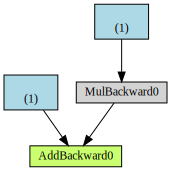

In [21]:
# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train_tensor

# Step 2 - Computes the loss
# We are using ALL data points, so this is BATCH gradient descent
# How wrong is our model? That's the error! 
error = y_train_tensor - yhat
# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

# We can try plotting the graph for any python variable: yhat, error, loss...
make_dot(yhat)

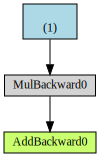

In [22]:
b_nograd = torch.randn(1, requires_grad=False, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = b_nograd + w * x_train_tensor

make_dot(yhat)

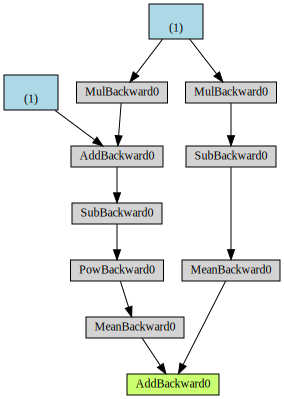

In [23]:
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = b + w * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()

# this makes no sense!!
if loss > 0:
    yhat2 = w * x_train_tensor
    error2 = y_train_tensor - yhat2
    
# neither does this :-)
loss += error2.mean()

make_dot(loss)

# Optimizer

## step / zero_grad

In [24]:
# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

### Cell 1.8

In [25]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes our model's predicted output - forward pass
    yhat = b + w * x_train_tensor
    
    # Step 2 - Computes the loss
    # We are using ALL data points, so this is BATCH gradient descent
    # How wrong is our model? That's the error! 
    error = y_train_tensor - yhat
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()
    
    # Step 4 - Updates parameters using gradients and the learning rate
    # No more manual update!
    # with torch.no_grad():
    #     b -= lr * b.grad
    #     w -= lr * w.grad
    optimizer.step()
    
    # No more telling Pytorch to let gradients go!
    # b.grad.zero_()
    # w.grad.zero_()
    optimizer.zero_grad()
    
print(b, w)

tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


# Loss

### Cell 1.9

In [26]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1

# Step 0 - Initializes parameters "a" and "b" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes our model's predicted output - forward pass
    yhat = b + w * x_train_tensor
    
    # Step 2 - Computes the loss
    # No more manual loss!
    # error = y_train_tensor - yhat
    # loss = (error ** 2).mean()
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - Computes gradients for both "a" and "b" parameters
    loss.backward()
    
    # Step 4 - Updates parameters using gradients and the learning rate
    optimizer.step()
    optimizer.zero_grad()
    
print(b, w)

tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


In [27]:
loss

tensor(0.0080, device='cuda:0', grad_fn=<MeanBackward0>)

In [28]:
# You will NOT get an error here if you do not have a GPU!
loss.cpu().numpy()

RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

In [29]:
loss.detach().cpu().numpy()

array(0.00804466, dtype=float32)

In [30]:
print(loss.item(), loss.tolist())

0.008044655434787273 0.008044655434787273


# Model

### Cell 1.10

In [31]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # To make "b" and "w" real parameters of the model, we need to wrap them with nn.Parameter
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.w = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x):
        # Computes the outputs / predictions
        return self.b + self.w * x

## Parameters

In [32]:
torch.manual_seed(42)
# Creates a "dummy" instance of our ManualLinearRegression model
dummy = ManualLinearRegression()
list(dummy.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

## state_dict

In [33]:
dummy.state_dict()

OrderedDict([('b', tensor([0.3367])), ('w', tensor([0.1288]))])

In [34]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.1,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'params': [140387999856752, 140386035993328]}]}

## device

In [35]:
torch.manual_seed(42)
# Creates a "dummy" instance of our ManualLinearRegression model and sends it to the device
dummy = ManualLinearRegression().to(device)

## Forward Pass

### Cell 1.11

In [36]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
# Now we can create a model and send it at once to the device
model = ManualLinearRegression().to(device)

# Defines a SGD optimizer to update the parameters (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    model.train() # What is this?!?

    # Step 1 - Computes our model's predicted output - forward pass
    # No more manual prediction!
    yhat = model(x_train_tensor)
    
    # Step 2 - Computes the loss
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - Computes gradients for both "a" and "b" parameters
    loss.backward()
    
    # Step 4 - Updates parameters using gradients and the learning rate
    optimizer.step()
    optimizer.zero_grad()
    
# We can also inspect its parameters using its state_dict
print(model.state_dict())

OrderedDict([('b', tensor([1.0235], device='cuda:0')), ('w', tensor([1.9690], device='cuda:0'))])


## train

In [37]:
## Never forget to include model.train() in your training loop!

## Nested Models

### Cell 1.12

In [38]:
class MyLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # Instead of our custom parameters, we use a Linear model with single input and single output
        self.linear = nn.Linear(1, 1)
                
    def forward(self, x):
        # Now it only takes a call
        self.linear(x)

In [39]:
torch.manual_seed(42)
dummy = MyLinearRegression().to(device)
list(dummy.parameters())

[Parameter containing:
 tensor([[0.7645]], device='cuda:0', requires_grad=True), Parameter containing:
 tensor([0.8300], device='cuda:0', requires_grad=True)]

## Sequential Models

### Cell 1.13

In [40]:
torch.manual_seed(42)
# Alternatively, you can use a Sequential model
model = nn.Sequential(nn.Linear(1, 1)).to(device)

print(model.state_dict())

OrderedDict([('0.weight', tensor([[0.7645]], device='cuda:0')), ('0.bias', tensor([0.8300], device='cuda:0'))])


## Layers

In [41]:
torch.manual_seed(42)
# Building the model from the figure above
model = nn.Sequential(nn.Linear(3, 5), nn.Linear(5, 1)).to(device)

print(model.state_dict())

OrderedDict([('0.weight', tensor([[ 0.4414,  0.4792, -0.1353],
        [ 0.5304, -0.1265,  0.1165],
        [-0.2811,  0.3391,  0.5090],
        [-0.4236,  0.5018,  0.1081],
        [ 0.4266,  0.0782,  0.2784]], device='cuda:0')), ('0.bias', tensor([-0.0815,  0.4451,  0.0853, -0.2695,  0.1472], device='cuda:0')), ('1.weight', tensor([[-0.2060, -0.0524, -0.1816,  0.2967, -0.3530]], device='cuda:0')), ('1.bias', tensor([-0.2062], device='cuda:0'))])


# Putting It All Together

In [42]:
import os
import errno

# If you're running this in Google Colab, it needs to create the folders
try:
    import google.colab

    folders = ['data_preparation', 'model_configuration', 'model_training']

    for folder in folders:
        try:
            os.mkdir(folder)
        except OSError as e:
            e.errno
            if e.errno != errno.EEXIST:
                raise
                
except ModuleNotFoundError:
    pass

## Data Preparation

### Data Preparation V0

In [43]:
%%writefile data_preparation/v0.py

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transform them into PyTorch's Tensors
# and then we send them to the chosen device
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

Overwriting data_preparation/v0.py


In [44]:
%run -i data_preparation/v0.py

<Figure size 432x288 with 0 Axes>

## Model Configurtion

### Model Configuration V0

In [45]:
%%writefile model_configuration/v0.py

# This is redundant now, but it won't be when we introduce Datasets...
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1

torch.manual_seed(42)
# Now we can create a model and send it at once to the device
model = nn.Sequential(nn.Linear(1, 1)).to(device)

# Defines a SGD optimizer to update the parameters (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

Overwriting model_configuration/v0.py


In [46]:
%run -i model_configuration/v0.py

## Model Training

### Model Training V0

In [47]:
%%writefile model_training/v0.py

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Sets model to TRAIN mode
    model.train()

    # Step 1 - Computes our model's predicted output - forward pass
    # No more manual prediction!
    yhat = model(x_train_tensor)
    
    # Step 2 - Computes the loss
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - Computes gradients for both "a" and "b" parameters
    loss.backward()
    
    # Step 4 - Updates parameters using gradients and the learning rate
    optimizer.step()
    optimizer.zero_grad()

Overwriting model_training/v0.py


In [48]:
%run -i model_training/v0.py

In [49]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.9690]], device='cuda:0')), ('0.bias', tensor([1.0235], device='cuda:0'))])
